In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from sklearn import linear_model
from sklearn import svm

In [ ]:
i3 = pd.read_csv(r"/content/drive/My Drive/ez/i3.csv")
i5 = pd.read_csv(r"/content/drive/My Drive/ez/i5.csv")
i7 = pd.read_csv(r"/content/drive/My Drive/ez/i7.csv")
i3_ins = i3[['instructions']].iloc[:2000]
i5_ins = i5[['instructions']].iloc[:2000]
i7_ins = i7[['instructions']].iloc[:2000]
print(i3.head)

In [ ]:

def find_min_mse():
  q_mse=[]
  for j in range(3,11):
    mse=[]
    tr_er=[]
    for i in range(1,100):
      rf = RandomForestRegressor(max_depth=j,n_estimators=i)
      rf.fit(X1_train,y1_train)
      rf_pred= rf.predict(X1_test)
      rf_pred_tr= rf.predict(X1_train)
      tr_er.append(mean_squared_error( y1_train,rf_pred_tr))
      mse.append(mean_squared_error( y1_test,rf_pred))
    q_mse.append((j, min(mse),mse.index(min(mse))))
    print('for depth: ',j)
    te, = plt.plot(mse,label='test_mSe')
    tr, = plt.plot(tr_er,label='train_mSe')
    plt.legend(handles=[te,tr])
    plt.show()

    return q

# i3-i5

In [ ]:
X1 = pd.concat([i3_ins,i5_ins], axis=1)
X1= X1.dropna()
X1= X1.values
X1_train, X1_test, y1_train, y1_test= train_test_split(X1[:,0],X1[:,1], test_size= 0.368)
X1_train= X1_train.reshape(-1,1)
X1_test= X1_test.reshape(-1,1)

## final rf model for predicting instructions for i5

In [ ]:
reg1 = linear_model.LinearRegression()
reg1.fit(X1_train,y1_train)
k1 = reg1.predict(X1_test)

In [ ]:
mean_absolute_error(y1_test,k1)

2452397.2773479274

In [ ]:
y1_test

In [ ]:
reg1.score(X1_test,y1_test)

0.9327575936323729

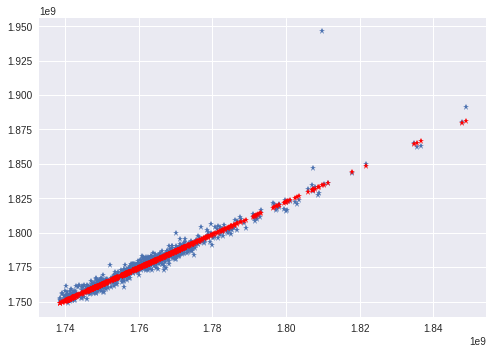

In [ ]:
plt.plot(X1_test,y1_test,'*',X1_test,k1,"r*")
plt.show()

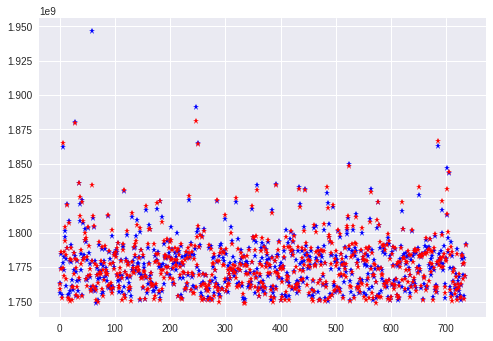

In [ ]:
plt.plot(y1_test,'b*')
plt.plot(k1,"r*")
plt.show()

In [ ]:
#for i in range(len(y1_test)):
#  print('True: ',y1_test.iloc[i],'Pred: ',rf_pred[i], 'Diff %= ',(y1_test.iloc[i]- rf_pred[i])/y1_test.iloc[i] )

# i3-i7

In [ ]:
X2= pd.concat([i3_ins,i7_ins], axis=1,ignore_index=True)
X2= X2.dropna()
X2=X2.values
X2_train, X2_test, y2_train, y2_test= train_test_split(X2[:,0],X2[:,1], test_size= 0.36)
X2_train= X2_train.reshape(-1,1)
X2_test= X2_test.reshape(-1,1)


## final rf model for predicting instructions for i7

In [ ]:
reg2 = linear_model.LinearRegression()
reg2.fit(X2_train,y2_train)
k2 = reg2.predict(X2_test)

In [ ]:
print(len(k2),len(y2_test),max(k2),max(y2_train))

720 720 1867697094.3002162 1876548287


In [ ]:
y2_test

3781825.718793362


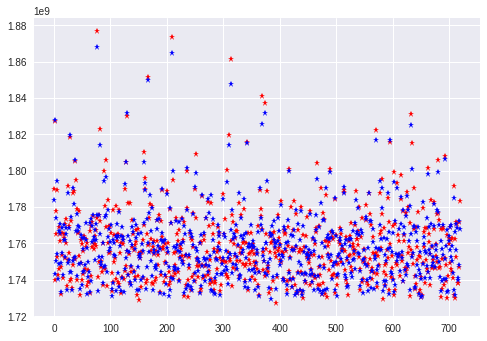

In [ ]:
print(mean_absolute_error(y2_test,k2))

plt.plot(y2_test,'r*')
plt.plot(k2,"b*")
plt.show()

In [ ]:
#for i in range(len(y2_test)):
#  print('True: ',y2_test.iloc[i],'Pred: ',rf_pred[i], 'Diff %= ',(y2test.iloc[i]- rf_pred[i])/y2_test.iloc[i] )

# predicting instructions for remaining 800 samples

In [ ]:
i3_test_800= i3[['instructions']].iloc[2000:2800].values
i5_test_800= i5[['instructions']].iloc[2000:2800].values
i7_test_800= i7[['instructions']].iloc[2000:2800].values

y-true = i5

In [ ]:
i5_pred_in_i3 = reg1.predict(i3_test_800)
print(mean_absolute_error(i5_test_800, i5_pred_in_i3))
print(mean_squared_error(i5_test_800, i5_pred_in_i3))

3557080.405064287
40458838893687.21


y-true = i7

In [ ]:
i7_pred_in_i3 = reg2.predict(i3_test_800)
print(mean_absolute_error(i7_test_800, i7_pred_in_i3))
print(mean_squared_error(i7_test_800, i7_pred_in_i3))

7437878.619302931
180463994893922.4


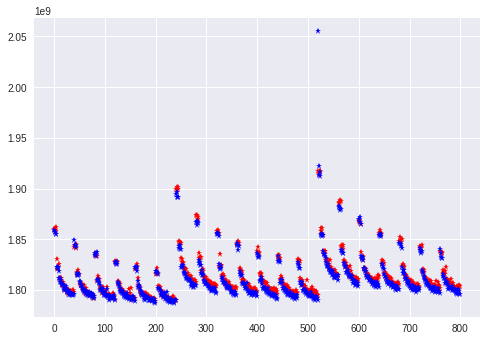

In [ ]:
plt.plot(i5_pred_in_i3,'r*')
plt.plot(i5_test_800,"b*")
plt.show()

# **Execution time prediction**

### training with first 2000 samples

In [ ]:
i5['machine']=1
i5['os'] = 1 #'i5'
i7['machine']=2
i7['os'] = 1 #'i7'
i3['machine']=3
i3['os'] = 1 #'i3'

In [ ]:
i3_tr = i3[['CPU_freq','CPU_cores_percent','memory','cycles','instructions','temperature','machine','os','time']].iloc[:2000]
i5_tr = i5[['CPU_freq','CPU_cores_percent','memory','cycles','instructions','temperature','machine','os','time']].iloc[:2000]
i7_tr = i7[['CPU_freq','CPU_cores_percent','memory','cycles','instructions','temperature','machine','os','time']].iloc[:2000]
#print(i3_tr)
#print(i5_tr)

In [ ]:
df = pd.concat([i3_tr,i5_tr,i7_tr],ignore_index=True)

In [ ]:
X = df[['CPU_freq','CPU_cores_percent','memory','cycles','instructions','temperature','machine','os']]
y = df[['time']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2)

In [ ]:
y_train = y_train.values.reshape(-1,)
y_test = y_test.values.reshape(-1,)

In [ ]:
y_train.shape

(4020,)

for depth:  3


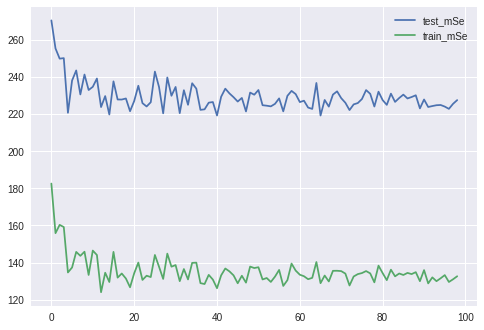

for depth:  4


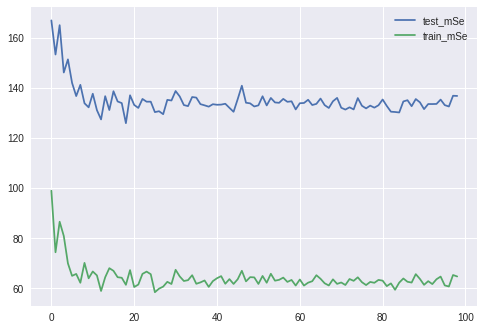

for depth:  5


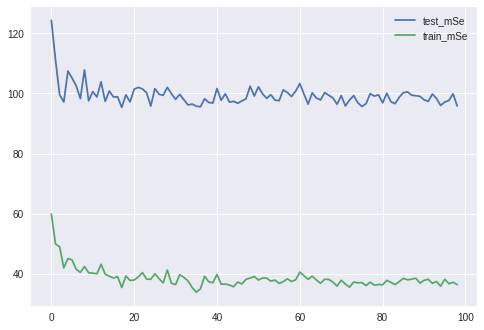

for depth:  6


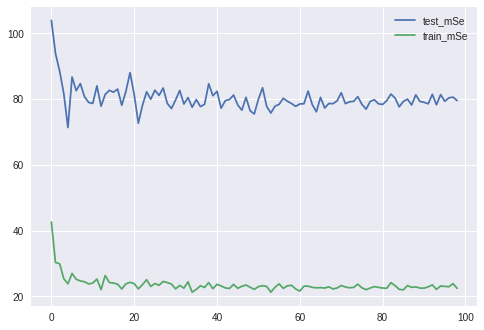

for depth:  7


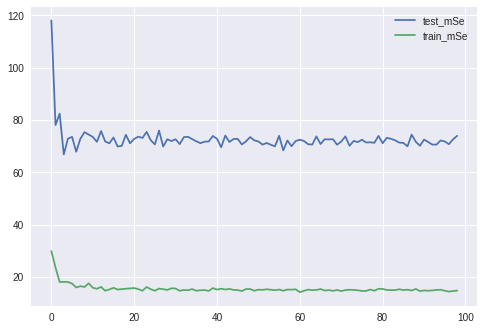

for depth:  8


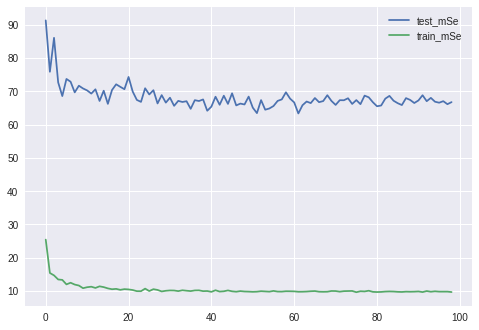

for depth:  9


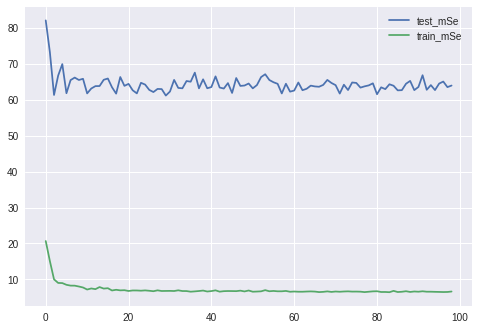

for depth:  10


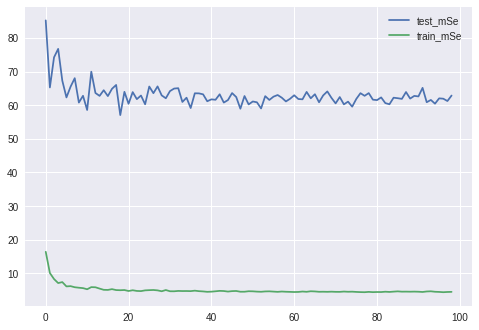

for depth:  11


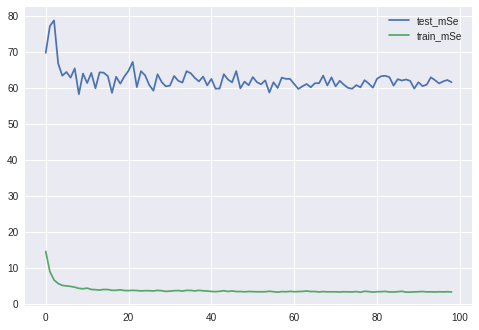

for depth:  12


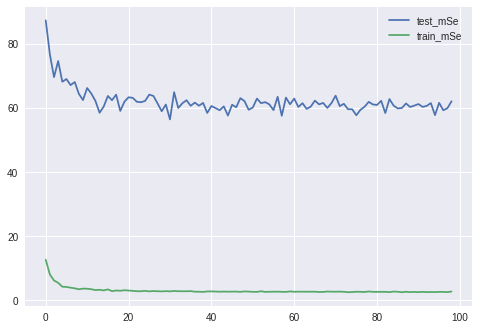

for depth:  13


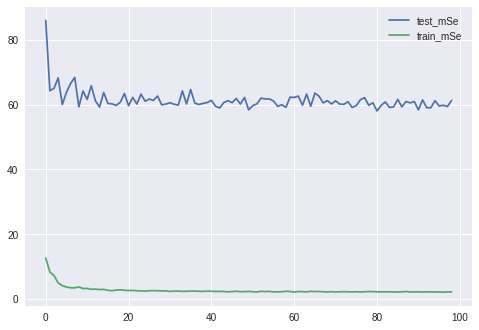

for depth:  14


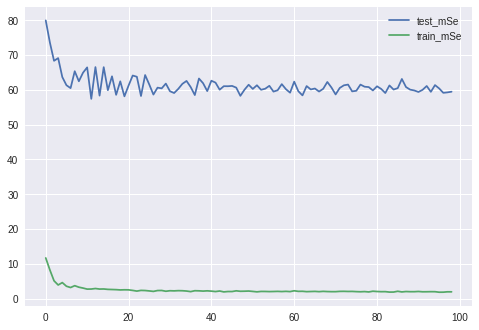

for depth:  15


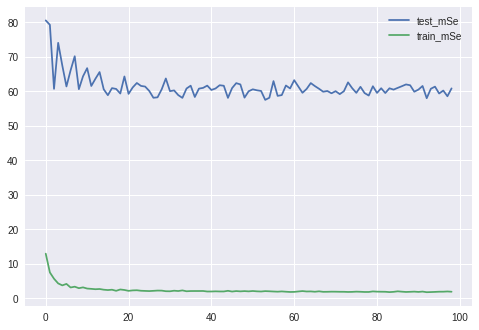

for depth:  16


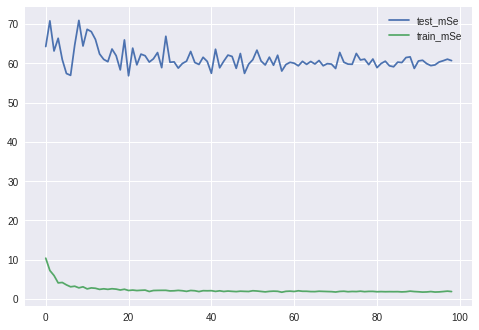

for depth:  17


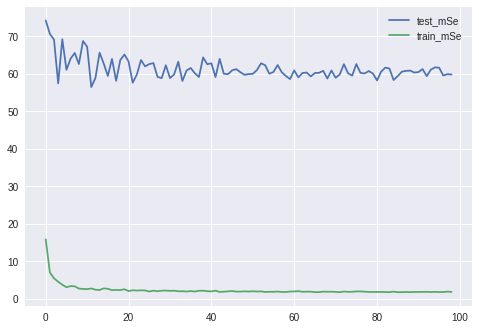

for depth:  18


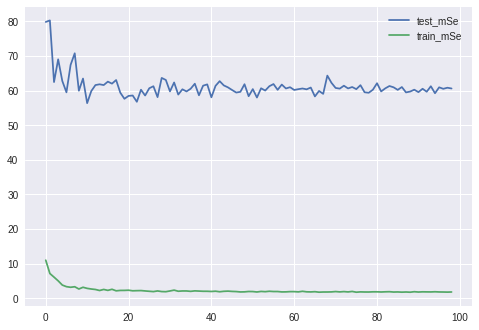

for depth:  19


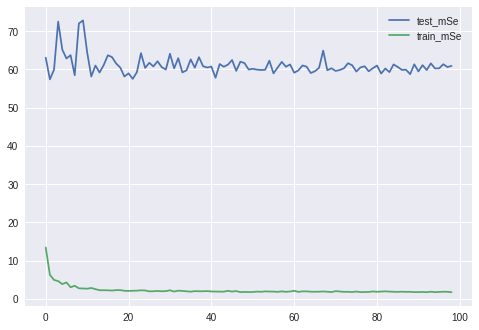

for depth:  20


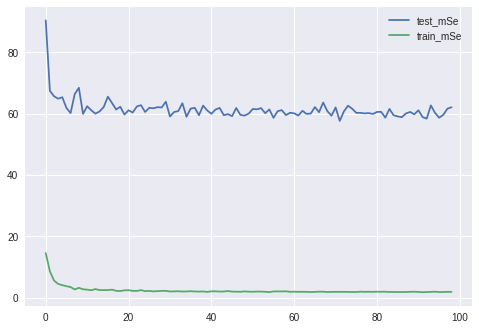

In [ ]:
q_mse=[]
for j in range(4,15):
  mse=[]
  tr_er=[]
  for i in range(1,100):
    rf = RandomForestRegressor(max_depth=j,n_estimators=i)
    rf.fit(X_train,y_train)
    rf_pred= rf.predict(X_test)
    rf_pred_tr= rf.predict(X_train)
    tr_er.append(mean_squared_error( y_train,rf_pred_tr))
    mse.append(mean_squared_error( y_test,rf_pred))
  q_mse.append((j, min(mse),mse.index(min(mse))))
  print('for depth: ',j)
  te, = plt.plot(mse,label='test_mSe')
  tr, = plt.plot(tr_er,label='train_mSe')
  plt.legend(handles=[te,tr])
  plt.show()

In [ ]:
q_mse

[(3, 219.2378615054842, 65),
 (4, 125.89543436058925, 18),
 (5, 95.39108925777566, 17),
 (6, 71.32068900714229, 4),
 (7, 66.8297926991363, 3),
 (8, 63.32835707833697, 61),
 (9, 61.19041723127537, 29),
 (10, 57.07193956809693, 18),
 (11, 58.275847515308385, 8),
 (12, 56.472869951308105, 30),
 (13, 58.09698423511534, 80),
 (14, 57.39509086247073, 11),
 (15, 57.533732136010926, 53),
 (16, 56.826614419883335, 20),
 (17, 56.50454014532547, 11),
 (18, 56.35945271479238, 10),
 (19, 57.41048685361338, 1),
 (20, 57.61066325964332, 71)]

In [ ]:
rfr = RandomForestRegressor(max_depth=10, n_estimators=18)
rfr.fit(X_train,y_train)
rf_pred= rfr.predict(X_test)
print(mean_squared_error( y_test,rf_pred))

65.47280006275359


In [ ]:
m = linear_model.Lasso()
m.fit(X_train,y_train)
pre= m.predict(X_test)
print(mean_squared_error( y_test,pre))

112.447531923249


### testing on 800 samples

In [ ]:
i3_t = i3[['CPU_freq','CPU_cores_percent','memory','cycles','instructions','temperature','machine','os','time']].iloc[2000:2800]
i5_t = i5[['CPU_freq','CPU_cores_percent','memory','cycles','temperature','machine','os','time']].iloc[2000:2800]
i7_t = i7[['CPU_freq','CPU_cores_percent','memory','cycles','temperature','machine','os','time']].iloc[2000:2800]
i5_t['instructions'] = i5_pred_in_i3
i7_t['instructions'] = i7_pred_in_i3

In [ ]:
df = pd.concat([i3_t,i5_t,i7_t],ignore_index=True)

In [ ]:
X = df[['CPU_freq','CPU_cores_percent','memory','cycles','instructions','temperature','machine','os']]
y = df[['time']]

In [ ]:
pred_final = rfr.predict(X)
print(mean_squared_error( y , pred_final))

483.0114743241013


In [ ]:
pred_lasso= m.predict(X)

In [ ]:
for i in range(len(y)):
  print('True: ',y.iloc[i][0],'Pred: ',pred_final[i], ' Diff%= ',(y.iloc[i][0]- pred_lasso[i]))#/y.iloc[i][0] )

True:  142.008176866 Pred:  172.93075113514817  Diff%=  10.615708173797913
True:  140.387888915 Pred:  172.53184015614818  Diff%=  6.595035606615653
True:  140.356580683 Pred:  171.94002807464818  Diff%=  8.80270764757148
True:  140.43010982299998 Pred:  172.68651705427783  Diff%=  8.961585597608888
True:  139.395810891 Pred:  171.79020948677783  Diff%=  10.433395201026883
True:  73.87697436 Pred:  87.6273827611611  Diff%=  -12.903111004317296
True:  71.97238085 Pred:  81.87213202327221  Diff%=  -5.693091932889317
True:  72.281658524 Pred:  85.68455406488333  Diff%=  -6.26993727911443
True:  72.212926808 Pred:  88.02289764161668  Diff%=  -8.586841653702109
True:  71.438679344 Pred:  81.7922566958889  Diff%=  -7.742932032804319
True:  50.919271343999995 Pred:  47.64452985489885  Diff%=  -16.64924451450905
True:  49.388451546000006 Pred:  47.051127732960886  Diff%=  -12.211151918695741
True:  49.593452593 Pred:  46.12201308996205  Diff%=  -12.55874732924024
True:  50.551556915 Pred:  46.

In [ ]:
from joblib import dump, load
dump(rfr, r'/content/drive/My Drive/ez/saved_rf_final.joblib')

['/content/drive/My Drive/ez/saved_rf_final.joblib']